In [2]:
!pip install tensorflow-gpu

In [3]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
tf.__version__

'2.5.0'

In [5]:
import struct, os

In [19]:
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte"%kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte"%kind)
    # label
    with open(labels_path, "rb") as la_path:
        magic, n = struct.unpack(">II", la_path.read(8))
        labels = np.fromfile(la_path, dtype = np.uint8)
    
    # image
    with open(images_path, "rb") as img_path:
        magic, num, rows, cols = struct.unpack(">IIII", img_path.read(16))
        images = np.fromfile(img_path, dtype = np.uint8).reshape(len(labels), 28**2)
        images = ((images/255)-0.5)*2
    
    return images, labels

In [25]:
X_train, y_train = load_mnist("C:/Users/CPB06GameN/Desktop/image_label_ubyte", kind = "train")
X_test, y_test = load_mnist("C:/Users/CPB06GameN/Desktop/image_label_ubyte", kind = "t10k")
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])

60000 784
10000 784


In [26]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)
X_train_centered = (X_train-mean_vals)/std_val
X_test_centered = (X_test-mean_vals)/std_val

In [27]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_train_onehot[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [33]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units = 50,
        input_dim = X_train_centered.shape[1],
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = "tanh"
    )
)
model.add(
    tf.keras.layers.Dense(
        units = 50,
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = "tanh"
))
model.add(
    tf.keras.layers.Dense(
        units = 10,
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = "softmax"
))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [36]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-7, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss ="categorical_crossentropy")

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [37]:
model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 3s 4ms/step - loss: 1.5616 - val_loss: 1.0417
Epoch 2/50
844/844 [==============================] - 1s 1ms/step - loss: 0.9321 - val_loss: 0.7480
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.7384 - val_loss: 0.6122
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.6350 - val_loss: 0.5322
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.5691 - val_loss: 0.4790
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.5226 - val_loss: 0.4407
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.4877 - val_loss: 0.4115
Epoch 8/50
844/844 [==============================] - 3s 4ms/step - loss: 0.4603 - val_loss: 0.3885
Epoch 9/50
844/844 [==============================] - 3s 3ms/step - loss: 0.4380 - val_loss: 0.3697
Epoch 10/50
844/844 [==============================] - 3s 3ms/step - loss: 0.4195 - val_loss: 0.3540

In [38]:
y_train_pred = model.predict_classes(X_train_centered, verbose=0)
y_train_pred[:3]

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 0, 4], dtype=int64)

In [39]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [44]:
y_test_pred = model.predict_classes(X_test_centered, verbose=0)
y_test_pred[:3]

array([7, 2, 1], dtype=int64)

In [40]:
total_predicts = np.sum(y_train==y_train_pred, axis=0)
print(total_predicts)
train_res = total_predicts/y_train.shape[0]
print(train_res)

56356
0.9392666666666667


In [42]:
total_predicts = np.sum(y_train==y_train_pred, axis=0)
print(total_predicts)
train_res = total_predicts/y_train.shape[0]
print(train_res)

56356
0.9392666666666667


In [45]:
n=0
for i, y in enumerate(y_test):
    if y != y_test_pred[i]:
        print(i, y, y_test_pred[i])
        n+=1
print(n)

8 5 6
33 4 6
46 1 3
63 3 2
66 6 7
92 9 4
124 7 4
149 2 9
187 5 3
217 6 5
233 8 7
241 9 8
245 3 6
247 4 2
259 6 0
300 4 6
313 3 5
320 9 7
321 2 7
340 5 3
352 5 0
362 2 7
372 0 3
380 0 5
403 8 5
444 2 8
445 6 0
447 4 9
448 9 8
449 3 5
464 3 7
478 5 8
479 9 3
495 8 0
502 5 3
507 3 5
511 4 1
530 9 4
531 3 1
542 8 4
543 8 3
551 7 1
565 4 9
578 3 2
591 8 3
619 1 8
628 3 9
629 2 6
659 2 8
684 7 3
691 8 4
707 4 9
710 5 8
717 0 6
720 5 2
728 2 8
740 4 9
741 2 8
760 4 9
791 5 9
839 8 3
844 8 7
857 5 3
881 4 9
882 9 7
898 7 2
924 2 7
939 2 0
947 8 9
950 7 2
951 5 4
965 6 0
982 3 8
998 8 9
999 9 7
1003 5 3
1014 6 5
1032 5 8
1039 7 9
1044 6 8
1062 3 7
1068 8 4
1082 5 3
1089 5 0
1101 8 2
1107 9 3
1112 4 6
1114 3 8
1124 8 7
1173 7 9
1181 6 1
1191 0 6
1192 9 4
1194 7 9
1198 8 4
1202 8 5
1204 3 8
1206 7 8
1208 3 9
1226 7 2
1232 9 4
1234 8 5
1242 4 9
1247 9 0
1256 2 3
1260 7 1
1283 7 2
1289 5 4
1299 5 7
1319 8 3
1325 8 6
1326 7 2
1328 7 9
1337 2 6
1364 8 2
1378 5 6
1393 5 3
1410 2 6
1433 8 3
1444 6 7
14

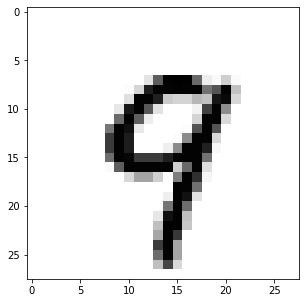

In [56]:
plt.figure(figsize=(5,5))
image = np.reshape(X_test[12], [28, 28])
plt.imshow(image, cmap="Greys")
plt.show()

In [58]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding = 'valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (5,5), padding = 'valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             